<a href="https://colab.research.google.com/github/haseebhijazi/grad_salary_prrediction/blob/main/grad_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATASET**

In [ ]:
path = "/content/Data/Engineering_graduate_salary.csv"
data = pd.read_csv(path)

data.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
data.shape

(2998, 34)

**UNDERSTANDING THE DATASET**

In [ ]:
data.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [ ]:
data.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2998.0,664892.583389,364895.076716,11244.0000,333464.750000,639694.500000,995177.000000,1.297877e+06
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12graduation,2998.0,2008.080720,1.631814,1998.0000,2007.000000,2008.000000,2009.000000,2.012000e+03
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
CollegeCityID,2998.0,5210.210807,4776.609877,2.0000,526.250000,4027.500000,8822.250000,1.840900e+04
CollegeCityTier,2998.0,0.296197,0.456655,0.0000,0.000000,0.000000,1.000000,1.000000e+00
GraduationYear,2998.0,2011.939960,36.780582,0.0000,2012.000000,2013.000000,2014.000000,2.017000e+03


**FEATURE SELECTION**

In [ ]:
data.drop(['ID', 'DOB', 'GraduationYear', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState'
                                     , 'CollegeCityTier'], axis = 1, inplace = True)

In [ ]:
data.dropna(inplace=True)
data.shape

(2998, 24)

In [ ]:
data.isnull().sum()

Gender                   0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

**DATA PRE-PROCESSING**

In [ ]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

data.head(25)

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,33,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,12,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,19,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,12,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,4,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
5,0,83.16,77.00,1,2,33,99.93,535,595,620,...,-1,-1,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000
6,0,72.50,53.20,2,0,37,68.00,510,495,405,...,469,-1,-1,-1,0.1282,-0.4536,0.3174,0.90660,-0.0943,150000
7,0,77.00,88.00,2,0,12,71.00,370,470,280,...,-1,-1,-1,-1,0.1282,0.5454,0.4711,0.90660,-0.2859,105000
8,1,76.80,87.70,2,0,32,73.15,510,555,440,...,-1,-1,-1,-1,-0.1590,-0.4536,0.1637,0.52620,-0.0943,195000
9,0,57.00,73.00,2,0,12,70.08,500,410,560,...,-1,-1,-1,-1,-0.7335,-0.4536,-0.2974,1.41360,0.6721,200000


<Axes: >

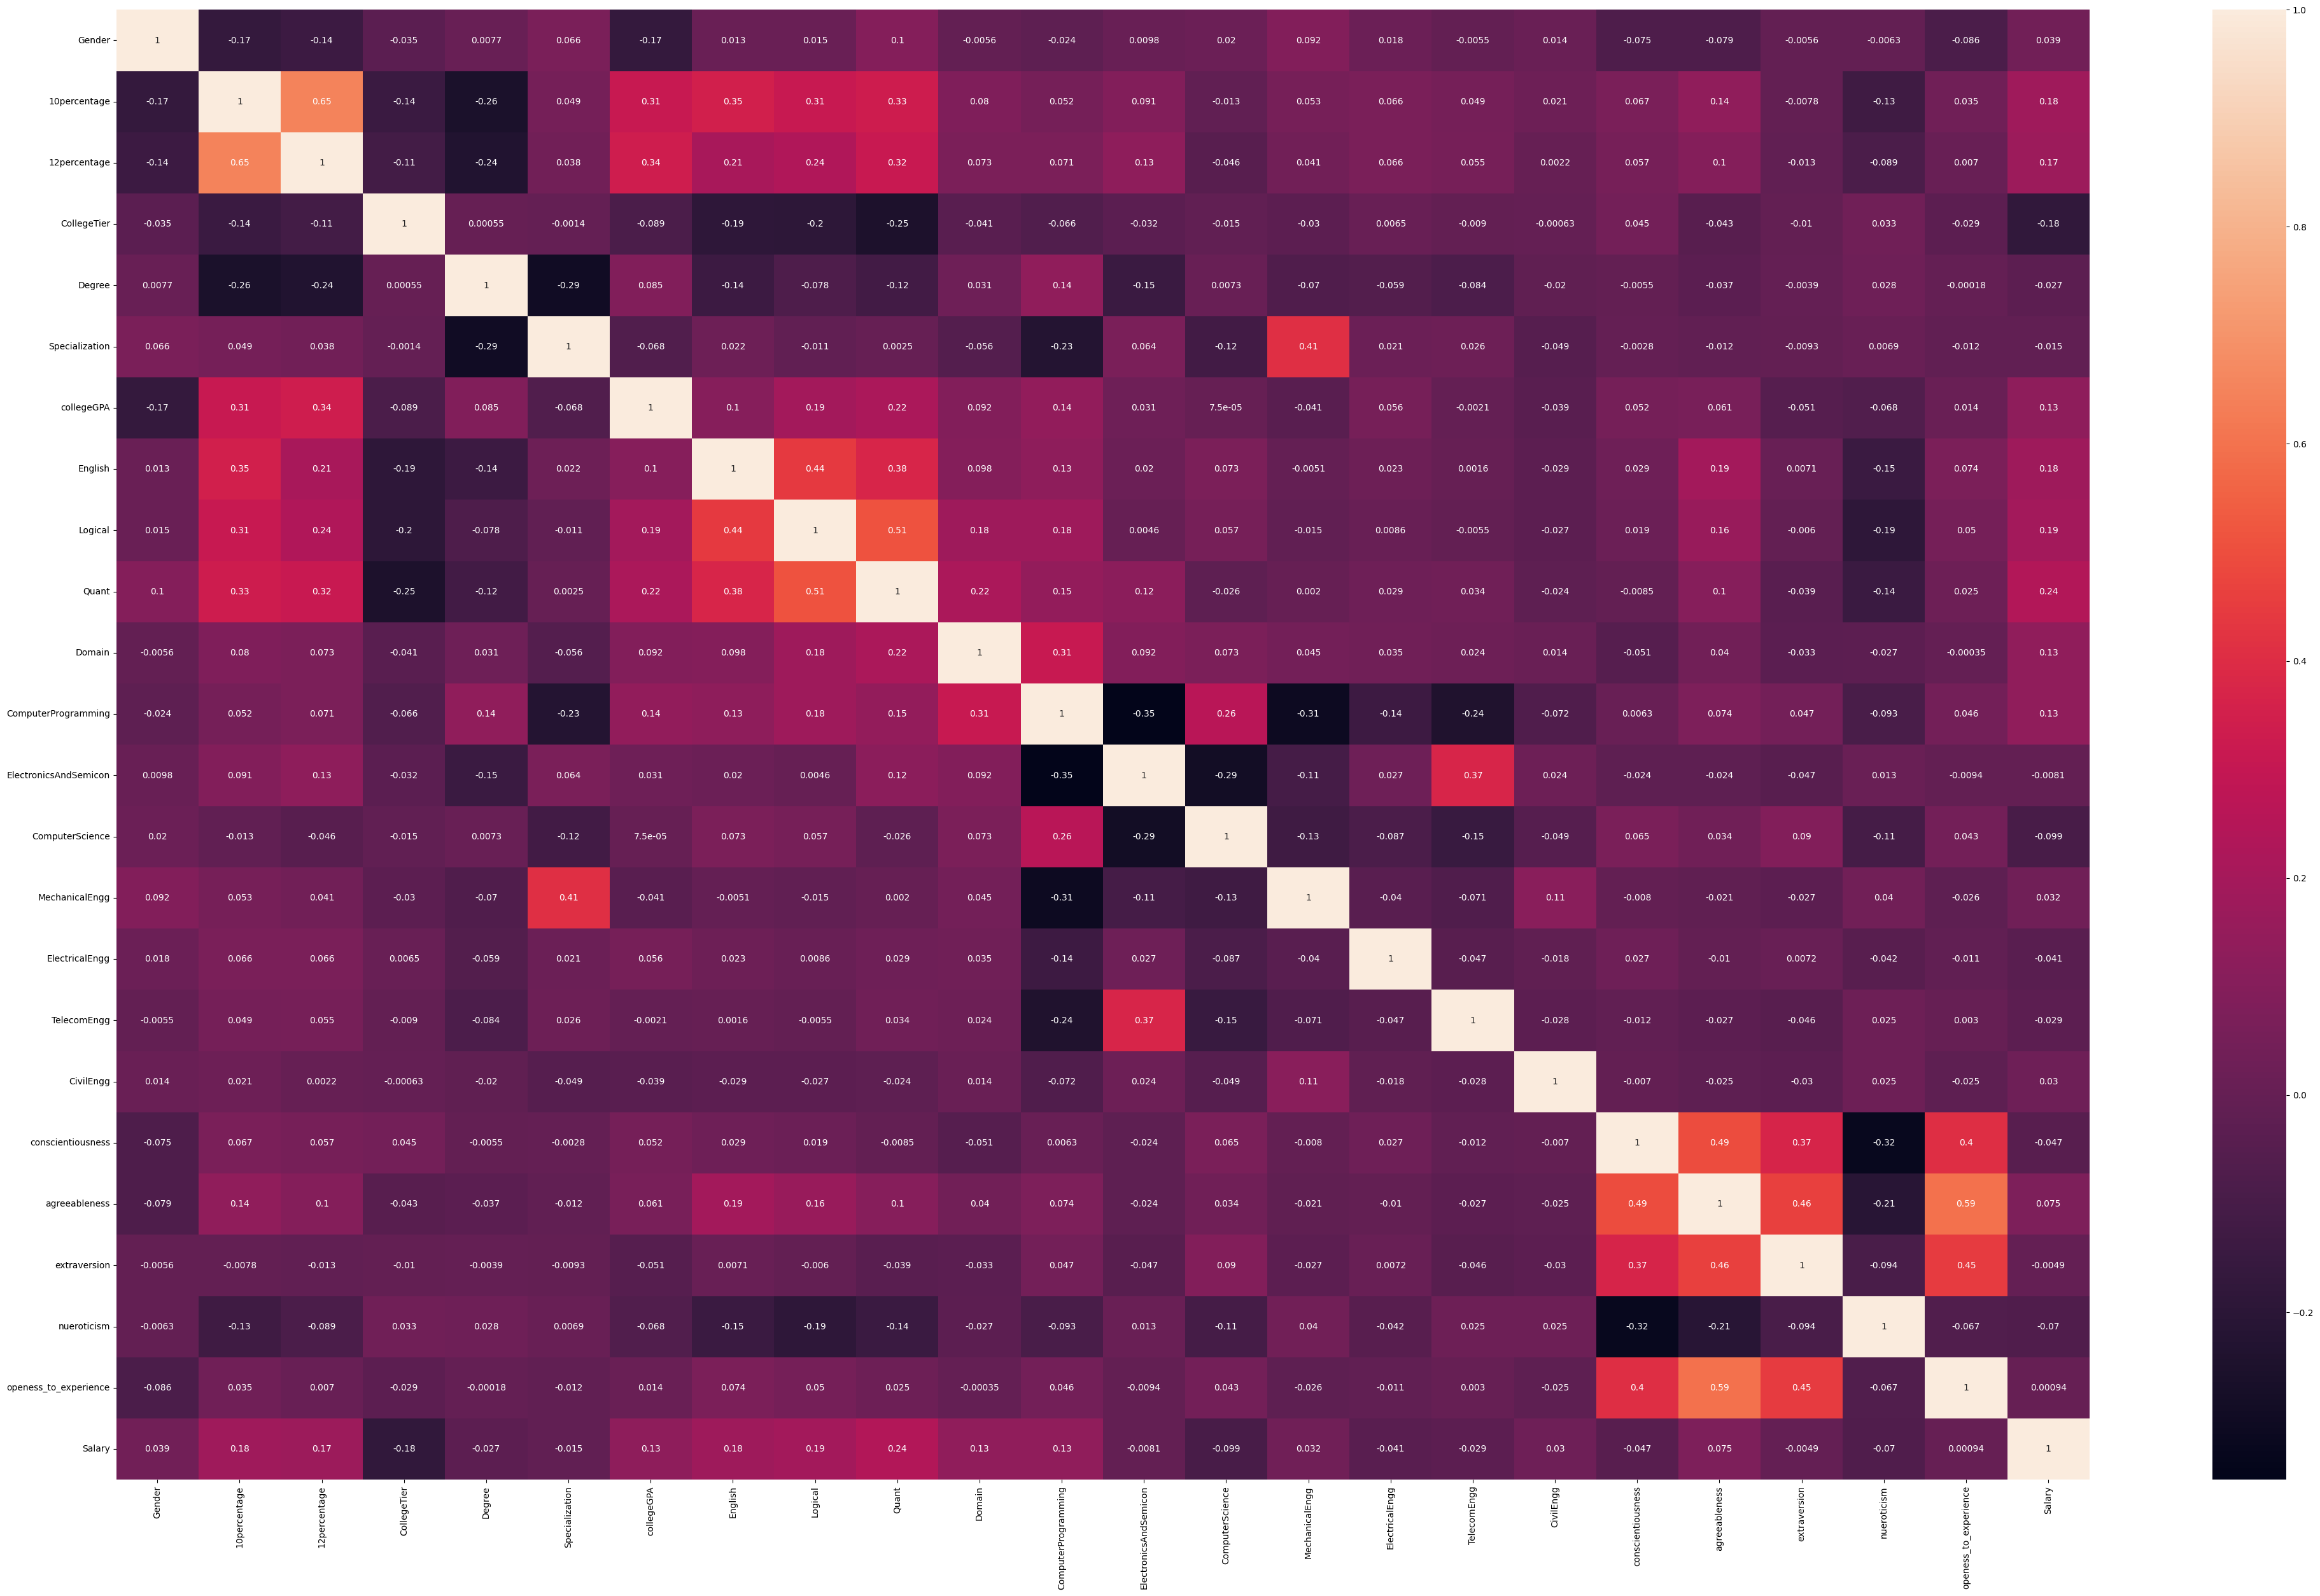

In [ ]:
plt.figure(figsize=(50,30))
sns.heatmap(data.corr(),annot=True)

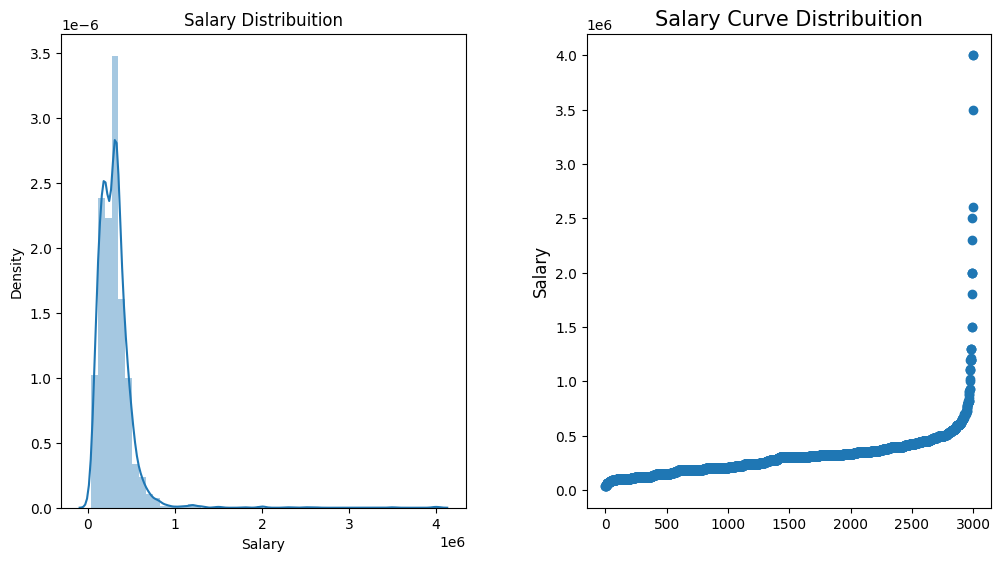

In [ ]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(data['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(data.shape[0]), np.sort(data.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.5,
                    top = 0.9)
plt.show()

**TRAIN_TEST DATA SPLIT**

In [ ]:
X = data.drop('Salary',axis=1)
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**LINEAR REGRESSION**

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)

linear_reg_r2_score = linear_reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_linear_reg)
rmse = mean_squared_error(y_test, y_pred_linear_reg, squared=False)
mae = mean_absolute_error(y_test, y_pred_linear_reg)

print("Linear Regression R^2 Score: {:.4f}".format(linear_reg_r2_score))
print("Mean Squared Error: {:.4f}".format(mse))
print("Root Mean Squared Error: {:.4f}".format(rmse))
print("Mean Absolute Error: {:.4f}".format(mae))
print("Linear Regression R^2 Score: {:.4f}".format(linear_reg_r2_score))

Linear Regression R^2 Score: 0.1865
Mean Squared Error: 26861590671.2685
Root Mean Squared Error: 163895.0599
Mean Absolute Error: 105803.7466
Linear Regression R^2 Score: 0.1865


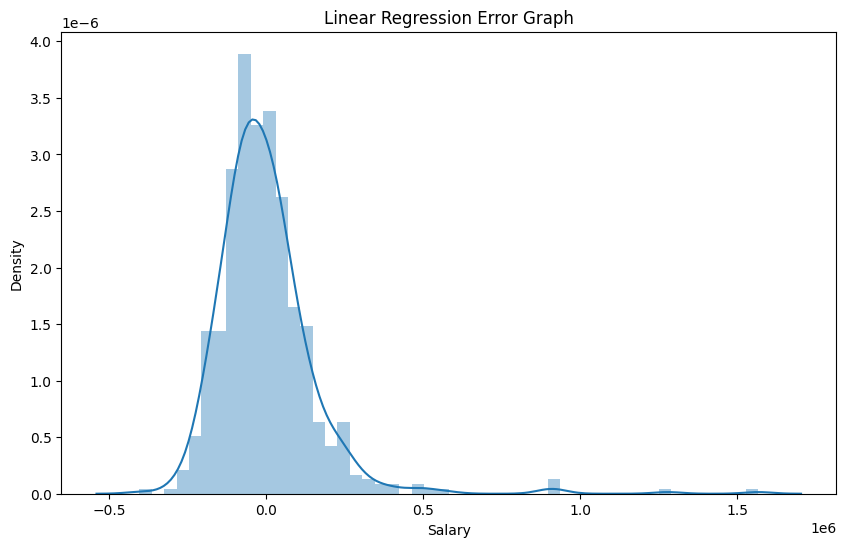

In [ ]:
errors_reg = y_test - y_pred_linear_reg

plt.figure(figsize = (10,6))
plt.title('Linear Regression Error Graph')
sns.distplot(errors_reg)
plt.show()

**K NEAREST NEIGHBORS**

In [ ]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_knn_reg = knn_reg.predict(X_test)

knn_reg_r2_score = knn_reg.score(X_test, y_test)
mse_knn = mean_squared_error(y_test, y_pred_knn_reg)
rmse_knn = mean_squared_error(y_test, y_pred_knn_reg, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn_reg)

print("K-Nearest Neighbors Regression R^2 Score: {:.4f}".format(knn_reg_r2_score))
print("Mean Squared Error (KNN): {:.4f}".format(mse_knn))
print("Root Mean Squared Error (KNN): {:.4f}".format(rmse_knn))
print("Mean Absolute Error (KNN): {:.4f}".format(mae_knn))

K-Nearest Neighbors Regression R^2 Score: -0.1086
Mean Squared Error (KNN): 36607008333.3333
Root Mean Squared Error (KNN): 191329.5804
Mean Absolute Error (KNN): 122691.6667


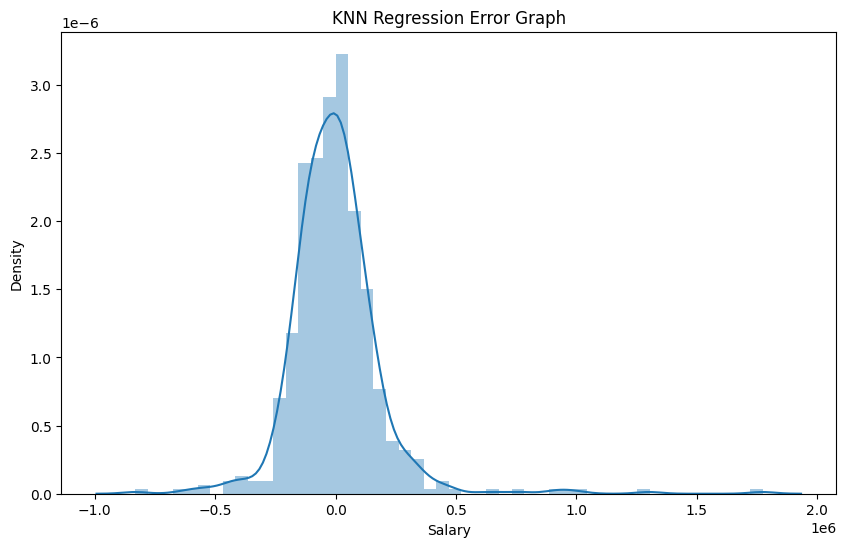

In [ ]:
errors_knn = y_test - y_pred_knn_reg

plt.figure(figsize=(10, 6))
plt.title('KNN Regression Error Graph')
sns.distplot(errors_knn)
plt.show()

**SUPPORT VECTOR MACHINE**

In [ ]:
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm_reg = svm_reg.predict(X_test)

svm_reg_r2_score = svm_reg.score(X_test, y_test)
mse_svm = mean_squared_error(y_test, y_pred_svm_reg)
rmse_svm = mean_squared_error(y_test, y_pred_svm_reg, squared=False)
mae_svm = mean_absolute_error(y_test, y_pred_svm_reg)

print("SVM Regression R^2 Score: {:.4f}".format(svm_reg_r2_score))
print("Mean Squared Error (SVM): {:.4f}".format(mse_svm))
print("Root Mean Squared Error (SVM): {:.4f}".format(rmse_svm))
print("Mean Absolute Error (SVM): {:.4f}".format(mae_svm))

SVM Regression R^2 Score: -0.0000
Mean Squared Error (SVM): 33022530644.9806
Root Mean Squared Error (SVM): 181721.0242
Mean Absolute Error (SVM): 121393.7883


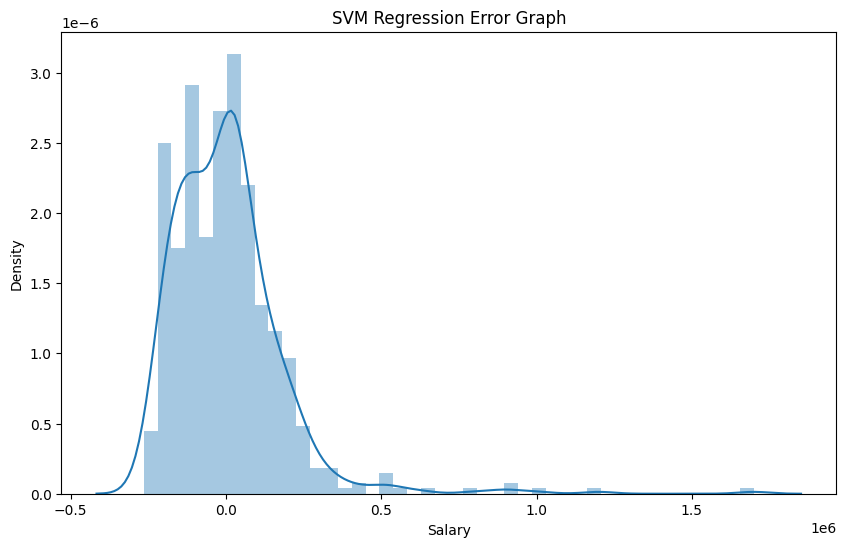

In [ ]:
errors_svm = y_test - y_pred_svm_reg

plt.figure(figsize=(10, 6))
plt.title('SVM Regression Error Graph')
sns.distplot(errors_svm)
plt.show()

**DECISION TREE**

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree_reg = tree_reg.predict(X_test)

tree_reg_r2_score = tree_reg.score(X_test, y_test)
mse_tree = mean_squared_error(y_test, y_pred_tree_reg)
rmse_tree = mean_squared_error(y_test, y_pred_tree_reg, squared=False)
mae_tree = mean_absolute_error(y_test, y_pred_tree_reg)

print("Decision Tree Regression R^2 Score: {:.4f}".format(tree_reg_r2_score))
print("Mean Squared Error (Decision Tree): {:.4f}".format(mse_tree))
print("Root Mean Squared Error (Decision Tree): {:.4f}".format(rmse_tree))
print("Mean Absolute Error (Decision Tree): {:.4f}".format(mae_tree))

Decision Tree Regression R^2 Score: -2.1343
Mean Squared Error (Decision Tree): 103499666666.6667
Root Mean Squared Error (Decision Tree): 321713.6408
Mean Absolute Error (Decision Tree): 170533.3333


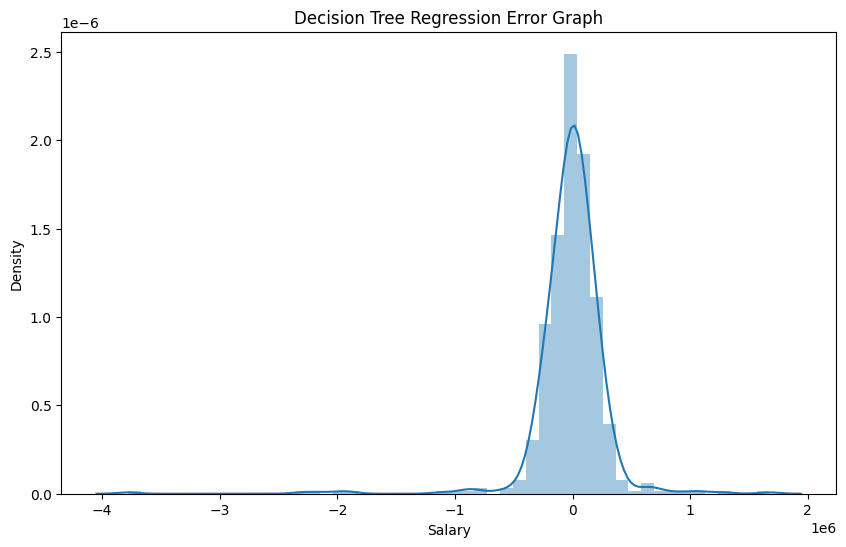

In [ ]:
errors_tree = y_test - y_pred_tree_reg

plt.figure(figsize=(10, 6))
plt.title('Decision Tree Regression Error Graph')
sns.distplot(errors_tree)
plt.show()

**RANDOM FOREST**

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_forest_reg = forest_reg.predict(X_test)

forest_reg_r2_score = forest_reg.score(X_test, y_test)
mse_forest = mean_squared_error(y_test, y_pred_forest_reg)
rmse_forest = mean_squared_error(y_test, y_pred_forest_reg, squared=False)
mae_forest = mean_absolute_error(y_test, y_pred_forest_reg)

print("Random Forest Regression R^2 Score: {:.4f}".format(forest_reg_r2_score))
print("Mean Squared Error (Random Forest): {:.4f}".format(mse_forest))
print("Root Mean Squared Error (Random Forest): {:.4f}".format(rmse_forest))
print("Mean Absolute Error (Random Forest): {:.4f}".format(mae_forest))

Random Forest Regression R^2 Score: -0.1638
Mean Squared Error (Random Forest): 38431365450.3333
Root Mean Squared Error (Random Forest): 196039.1937
Mean Absolute Error (Random Forest): 118152.7000


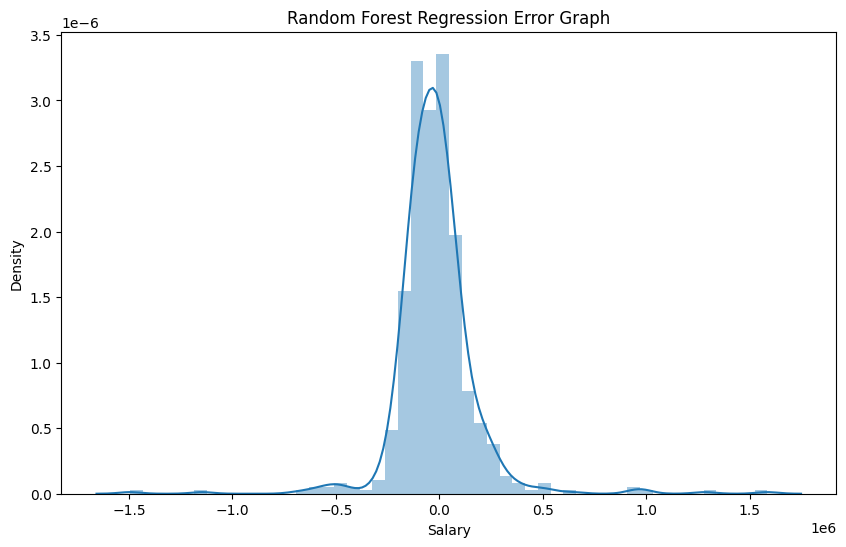

In [ ]:
errors_forest = y_test - y_pred_forest_reg

plt.figure(figsize=(10, 6))
plt.title('Random Forest Regression Error Graph')
sns.distplot(errors_forest)
plt.show()

**XGBOOST MODEL**

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_r2_score = xgb.score(X_test, y_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regression R^2 Score: {:.5f}".format(xgb_r2_score))
print("Mean Squared Error (XGBoost): {:.5f}".format(mse_xgb))
print("Root Mean Squared Error (XGBoost): {:.5f}".format(rmse_xgb))
print("Mean Absolute Error (XGBoost): {:.5f}".format(mae_xgb))

XGBoost Regression R^2 Score: -0.03878
Mean Squared Error (XGBoost): 34302204505.73558
Root Mean Squared Error (XGBoost): 185208.54328
Mean Absolute Error (XGBoost): 120126.09609


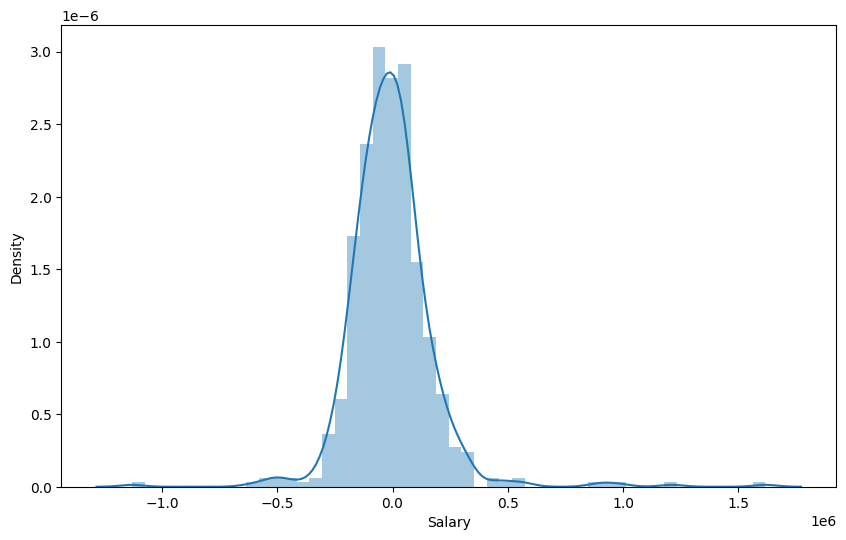

In [ ]:
errors_xgb = y_test - y_pred_xgb

plt.figure(figsize = (10,6))
sns.distplot(errors_xgb)
plt.show()

**COMPARISON OF ERROR GRAPHS**

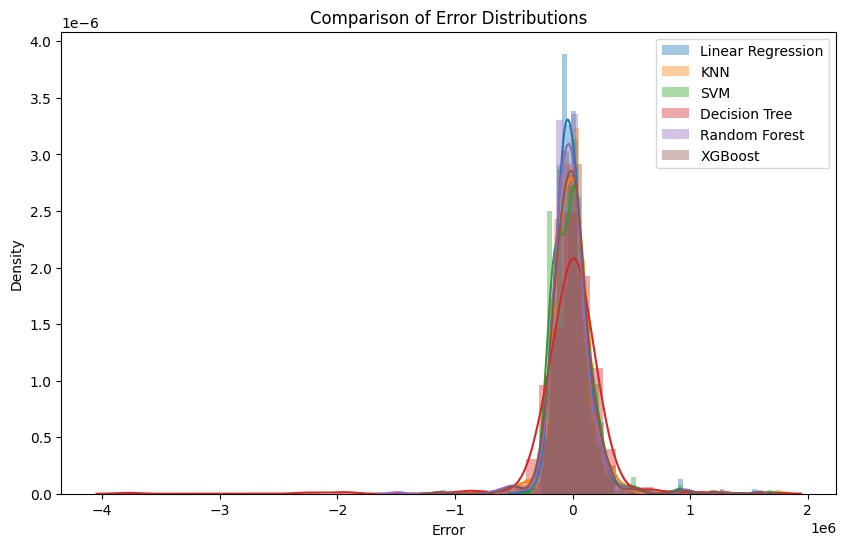

In [ ]:
plt.figure(figsize=(10, 6))

# Plot Linear Regression error distribution
sns.distplot(errors_reg, label='Linear Regression')

# Plot KNN error distribution
sns.distplot(errors_knn, label='KNN')

# Plot SVM error distribution
sns.distplot(errors_svm, label='SVM')

# Plot Decision Tree error distribution
sns.distplot(errors_tree, label='Decision Tree')

# Plot Random Forest error distribution
sns.distplot(errors_forest, label='Random Forest')

# Plot XGBoost error distribution
sns.distplot(errors_xgb, label='XGBoost')

plt.title('Comparison of Error Distributions')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.show()

**CROSS-VALIDATION**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create Random Forest regressor
forest_reg = RandomForestRegressor(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Use best model
best_forest_reg = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = best_forest_reg.predict(X_train)

# Make predictions on the test set
y_pred_test = best_forest_reg.predict(X_test)

# Calculate evaluation metrics on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train Set MSE: {:.5f}".format(mse_train))
print("Train Set RMSE: {:.5f}".format(rmse_train))
print("Train Set MAE: {:.5f}".format(mae_train))

print("Test Set MSE: {:.5f}".format(mse_test))
print("Test Set RMSE: {:.5f}".format(rmse_test))
print("Test Set MAE: {:.5f}".format(mae_test))

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Train Set MSE: 24374127397.77724
Train Set RMSE: 156122.15537
Train Set MAE: 69029.38918
Test Set MSE: 29872126748.67612
Test Set RMSE: 172835.54828
Test Set MAE: 110623.48470


In [ ]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create Decision Tree regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(tree_reg, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Use best model
best_tree_reg = grid_search.best_estimator_

# Make predictions on the training set
y_pred_train = best_tree_reg.predict(X_train)

# Make predictions on the test set
y_pred_test = best_tree_reg.predict(X_test)

# Calculate evaluation metrics on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculate evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Train Set MSE: {:.5f}".format(mse_train))
print("Train Set RMSE: {:.5f}".format(rmse_train))
print("Train Set MAE: {:.5f}".format(mae_train))

print("Test Set MSE: {:.5f}".format(mse_test))
print("Test Set RMSE: {:.5f}".format(rmse_test))
print("Test Set MAE: {:.5f}".format(mae_test))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Set MSE: 30122895431.64200
Train Set RMSE: 173559.48672
Train Set MAE: 92897.76779
Test Set MSE: 50454737981.13985
Test Set RMSE: 224621.32130
Test Set MAE: 138836.19605
